In [1]:
import sympy as sp
from mira.metamodel import *
from mira.sources.sympy_ode import template_model_from_sympy_odes
from mira.modeling.amr.petrinet import template_model_to_petrinet_json_file

# Define time variable
t = sp.symbols("t")

# Define time-dependent variables
S_l, S_h, E_h, P, I1, I2, H, R_h, S_r, E_r, I_r, R_r = sp.symbols(
    "S_l S_h E_h P I1 I2 H R_h S_r E_r I_r R_r", cls=sp.Function
)

# Define the parameters with spelled-out names
delta_i, eta, alpha, beta_hh, beta_rr, beta_rh, pi_h, rho, nu, lambda_h, mu_h, sigma_h, omega, theta, k1, k2, tau1, tau2, tau3, delta_h, pi_r, lambda_r, mu_r, sigma_r, delta_r, tau_r = sp.symbols(
    "delta_i eta alpha beta_hh beta_rr beta_rh pi_h rho nu lambda_h mu_h sigma_h omega theta k1 k2 tau1 tau2 tau3 delta_h pi_r lambda_r mu_r sigma_r delta_r tau_r"
)

# Define the system of ODEs
N_h = S_h(t) + S_l(t) + E_h(t) + P(t) + I1(t) + I2(t) + H(t) + R_h(t)
N_r = S_r(t) + E_r(t) + I_r(t) + R_r(t)
lambda_h = beta_hh * (alpha*P(t) + eta*I1(t) + I2(t)) / N_h + beta_rh * I_r(t) / N_r
lambda_r = beta_rr * I_r(t) / N_r

odes4 = [
    sp.Eq(S_l(t).diff(t), pi_h * (1 - rho) - nu * lambda_h * S_l(t) - mu_h * S_l(t)),
    sp.Eq(S_h(t).diff(t), pi_h * rho - lambda_h * S_h(t) - mu_h * S_h(t)),
    sp.Eq(E_h(t).diff(t), nu * S_l(t) * lambda_h + S_h(t) * lambda_h - (sigma_h + mu_h) * E_h(t)),
    sp.Eq(P(t).diff(t), sigma_h * E_h(t) - (omega + mu_h) * P(t)),
    sp.Eq(I1(t).diff(t), omega * P(t) - (theta + k1 + tau1 + mu_h) * I1(t)),
    sp.Eq(I2(t).diff(t), theta * I1(t) - (k2 + delta_i + tau2 + mu_h) * I2(t)),
    sp.Eq(H(t).diff(t), k1 * I1(t) + k2 * I2(t) - (delta_h + tau3 + mu_h) * H(t)),
    sp.Eq(R_h(t).diff(t), tau1 * I1(t) + tau2 * I2(t) + tau3 * H(t) - mu_h * R_h(t)),
    sp.Eq(S_r(t).diff(t), pi_r - lambda_r * S_r(t) - mu_r * S_r(t)),
    sp.Eq(E_r(t).diff(t), lambda_r * S_r(t) - (sigma_r + mu_r) * E_r(t)),
    sp.Eq(I_r(t).diff(t), sigma_r * E_r(t) - (delta_r + tau_r + mu_r) * I_r(t)),
    sp.Eq(R_r(t).diff(t), tau_r * I_r(t) - mu_r * R_r(t)),
]

concept_data = {
    'S_l': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'low', 'species': 'ncbitaxon:9606'}},
    'S_h': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'high', 'species': 'ncbitaxon:9606'}},
    'E_h': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9606'}},
    'P': {'identifiers': {'ido': '0000511'},
          'context': {'stage': 'predromal', 'species': 'ncbitaxon:9606'}},
    'I1': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'mild', 'species': 'ncbitaxon:9606'}},
    'I2': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'severe', 'species': 'ncbitaxon:9606'}},
    'H': {'identifiers': {'ido': '0000511'},
         'context': {'hospitalization': 'ncit:C25179', 'species': 'ncbitaxon:9606'}},
    'R_h': {'identifiers': {'ido': '0000592'},
         'context': {'species': 'ncbitaxon:9606'}},
    'S_r': {'identifiers': {'ido': '0000514'},
            'context': {'species': 'ncbitaxon:9989'}},
    'E_r': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9989'}},
    'I_r': {'identifiers': {'ido': '0000511'},
           'context': {'species': 'ncbitaxon:9989'}},
    'R_r': {'identifiers': {'ido': '0000592'},
            'context': {'species': 'ncbitaxon:9989'}},
}

parameter_data = {
    'Nh': {'value': 1.8e8},
    'Nr': {'value': 1.8e6},
    'mu_h': {'value': 0.000045},
    'mu_r': {'value': 0.002},
    'pi_h': {'value': 2500},
    'pi_r': {'value': 0.5},
    'rho': {'value': 0.8},
    'nu': {'value': 0.045},
    'beta_hh': {'value': 0.03},
    'beta_rh': {'value': 0.3045},
    'beta_rr': {'value': 0.025},
    'alpha': {'value': 0.75},
    'eta': {'value': 0.8},
    'sigma_h': {'value': 0.033},
    'sigma_r': {'value': 0.0083},
    'omega': {'value': 0.0042},
    'theta': {'value': 0.021},
    'k1': {'value': 0.2},
    'k2': {'value': 0.4},
    'tau1': {'value': 0.048},
    'tau2': {'value': 0.05},
    'tau3': {'value': 0.056},
    'tau_r': {'value': 0.083},
    'delta_i': {'value': 0.0011},
    'delta_h': {'value': 0.001},
    'delta_r': {'value': 0.057},
}


initials = {
    'S_l': Initial(concept=Concept(name='S_l'), expression=SympyExprStr(sp.Float(12e7))),
    'S_h': Initial(concept=Concept(name='S_h'), expression=SympyExprStr(sp.Float(6e7))),
    'E_h': Initial(concept=Concept(name='E_h'), expression=SympyExprStr(sp.Float(2000))),
    'P': Initial(concept=Concept(name='P'), expression=SympyExprStr(sp.Float(70))),
    'I1': Initial(concept=Concept(name='I1'), expression=SympyExprStr(sp.Float(2))),
    'I2': Initial(concept=Concept(name='I2'), expression=SympyExprStr(sp.Float(1))),
    'H': Initial(concept=Concept(name='H'), expression=SympyExprStr(sp.Float(1))),
    'R_h': Initial(concept=Concept(name='R_h'), expression=SympyExprStr(sp.Float(0))),
    'S_r': Initial(concept=Concept(name='S_r'), expression=SympyExprStr(sp.Float(6e5))),
    'E_r': Initial(concept=Concept(name='E_r'), expression=SympyExprStr(sp.Float(800))),
    'I_r': Initial(concept=Concept(name='I_r'), expression=SympyExprStr(sp.Float(16))),
    'R_r': Initial(concept=Concept(name='R_r'), expression=SympyExprStr(sp.Float(2))),
}

case_expr = sp.parse_expr('P + I1 + I2 + H')


In [2]:
tm = template_model_from_sympy_odes(odes4, param_data=parameter_data, concept_data=concept_data)
tm.initials = initials

In [19]:
p1 = tm.templates[1].rate_law
p2 = tm.templates[5].rate_law
case_expr = SympyExprStr(p1.args[0] + p2.args[0])
observables = {
    'cases_E': Observable(name='cases_E', expression=SympyExprStr(case_expr)),
    'cases_I1': Observable(name='cases_I1', expression=SympyExprStr(sp.parse_expr('E_h*sigma_h'))),
    'cases_I2': Observable(name='cases_I2', expression=SympyExprStr(sp.parse_expr('I1*theta')))

}
case_expr.args[0]

S_h*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l)) + S_l*nu*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l))

In [20]:
tm.observables = observables

In [21]:
template_model_to_petrinet_json_file(tm, 'ModelA_base_petri.json')

In [ ]:
tm.draw_jupyter()

In [ ]:
from mira.modeling import Model
from mira.modeling.ode import OdeModel, simulate_ode_model

In [24]:
om = OdeModel(Model(tm), initialized=True)

In [25]:
om.get_interpretable_kinetics()

Matrix([
[Derivative(S_l, t), =,                                                                                                                    -S_l*mu_h - S_l*nu*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l)) + pi_h*(1 - rho)],
[  Derivative(H, t), =,                                                                                                                                                                                                                               -H*(delta_h + mu_h + tau3) + I1*k1 + I2*k2],
[  Derivative(P, t), =,                                                                                                                                                                                                                                           E_h*sigma_h - P*(mu_h + omega)],
[Derivative(E_h, t), =, -E_h*(mu_h + sigma_h) + S_h*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*al

In [26]:
om.vmap

{('S_l',
  ('identity', 'ido:0000514'),
  ('severity', 'low'),
  ('species', 'ncbitaxon:9606')): 0,
 ('H',
  ('identity', 'ido:0000511'),
  ('hospitalization', 'ncit:C25179'),
  ('species', 'ncbitaxon:9606')): 1,
 ('P',
  ('identity', 'ido:0000511'),
  ('species', 'ncbitaxon:9606'),
  ('stage', 'predromal')): 2,
 ('E_h', ('identity', 'apollosv:00000154'), ('species', 'ncbitaxon:9606')): 3,
 ('R_h', ('identity', 'ido:0000592'), ('species', 'ncbitaxon:9606')): 4,
 ('I_r', ('identity', 'ido:0000511'), ('species', 'ncbitaxon:9989')): 5,
 ('I2',
  ('identity', 'ido:0000511'),
  ('species', 'ncbitaxon:9606'),
  ('stage', 'severe')): 6,
 ('R_r', ('identity', 'ido:0000592'), ('species', 'ncbitaxon:9989')): 7,
 ('I1',
  ('identity', 'ido:0000511'),
  ('species', 'ncbitaxon:9606'),
  ('stage', 'mild')): 8,
 ('E_r', ('identity', 'apollosv:00000154'), ('species', 'ncbitaxon:9989')): 9,
 ('S_h',
  ('identity', 'ido:0000514'),
  ('severity', 'high'),
  ('species', 'ncbitaxon:9606')): 10,
 ('S_r', ('

In [49]:
import numpy as np
import matplotlib.pyplot as plt

times = np.linspace(0, 35*7, 100)
res = simulate_ode_model(om, times, with_observables=True)

In [50]:
res[:, -3]

array([ 530.92557334,  833.08634062, 1040.03245939, 1180.60097288,
       1275.04738225, 1337.58528065, 1378.17639723, 1403.79169555,
       1419.29951951, 1428.09098609, 1432.52023152, 1434.21419308,
       1434.29065252, 1433.51120033, 1432.38956256, 1431.26609064,
       1430.36043327, 1429.81249273, 1429.70439386, 1430.07792607,
       1430.95247055, 1432.3290516 , 1434.19805456, 1436.54313646,
       1439.34426381, 1442.57976625, 1446.22730219, 1450.26478878,
       1454.67097346, 1459.4256944 , 1464.51008141, 1469.90657854,
       1475.59901371, 1481.5725516 , 1487.81359631, 1494.30971995,
       1501.04962123, 1508.02305085, 1515.22068113, 1522.63406592,
       1530.25555527, 1538.07823183, 1546.09583819, 1554.30272602,
       1562.69379997, 1571.26447913, 1580.01059388, 1588.92840052,
       1598.01455816, 1607.26606638, 1616.68024746, 1626.25467782,
       1635.98716608, 1645.87579473, 1655.91889454, 1666.11494009,
       1676.46254761, 1686.96059198, 1697.60804946, 1708.40402

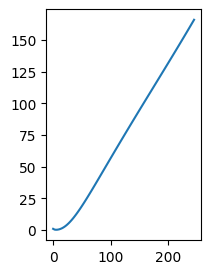

In [53]:
plt.figure(figsize=(2, 3))
plt.plot(times, res[:, 6])

In [41]:
om.observable_map

{'cases_E': 0, 'cases_I1': 1, 'cases_I2': 2}

In [31]:
tm.observables

{'cases_E': Observable(name='cases_E', display_name=None, description=None, identifiers={}, context={}, units=None, expression=SympyExprStr(S_h*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l)) + S_l*nu*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l)))),
 'cases_I1': Observable(name='cases_I1', display_name=None, description=None, identifiers={}, context={}, units=None, expression=E_h*sigma_h),
 'cases_I2': Observable(name='cases_I2', display_name=None, description=None, identifiers={}, context={}, units=None, expression=I1*theta)}

In [32]:
Model(tm).observables

{'cases_E': <mira.modeling.ModelObservable at 0x1370b5510>,
 'cases_I1': <mira.modeling.ModelObservable at 0x116049f00>,
 'cases_I2': <mira.modeling.ModelObservable at 0x1378feb60>}